## Product Topic classification

### import data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import swifter
import gc
import nltk 
import sklearn 
import collections
import sys
import itertools
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import pickle

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
narratives = pd.read_csv("/content/drive/MyDrive/QMSS Practicum 2021/narratives_token.csv")

In [63]:
narratives= narratives[['Date_received', 'Product', 'Sub_product', 'Issue',
       'Sub-issue', 'Consumer_complaint_narrative', 'Company_public_response',
       'Company', 'State', 'Tags', 'Consumer_consent_provided?',
       'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response?', 'Consumer_disputed?',
       'Consumer_complaint_narrative_token',
       'Consumer_complaint_narrative_length']]
narratives.head()

,Date_received,Product,Sub_product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,Tags,Consumer_consent_provided?,Date_sent_to_company,Company_response_to_consumer,Timely_response?,Consumer_disputed?,Consumer_complaint_narrative_token,Consumer_complaint_narrative_length
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld system inc tri collect debt mine ow...,NaN,TRANSWORLD SYSTEMS INC,FL,NaN,Consent provided,2019-09-24,Closed with explanation,Yes,NaN,"['transworld', 'system', 'inc', 'tri', 'collec...",9
1,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,past week receiv excess amount telephon call c...,NaN,"Diversified Consultants, Inc.",NC,NaN,Consent provided,2019-11-08,Closed with explanation,Yes,NaN,"['past', 'week', 'receiv', 'excess', 'amount',...",29
2,2019-09-15,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,pioneer commit sever feder violat privat law a...,NaN,Pioneer Capital Solutions Inc,CA,NaN,Consent provided,2019-09-15,Closed with explanation,Yes,NaN,"['pioneer', 'commit', 'sever', 'feder', 'viola...",72
3,2021-02-02,Vehicle loan or lease,Loan,Struggling to pay your loan,Lender trying to repossess or disable the vehicle,employe work region accept keep call repeat ca...,Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,FL,NaN,Consent provided,2021-02-02,Closed with explanation,Yes,NaN,"['employe', 'work', 'region', 'accept', 'keep'...",24
4,2019-07-26,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,previous request experian send copi verifi pro...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,NaN,Consent provided,2019-07-26,Closed with explanation,Yes,NaN,"['previous', 'request', 'experian', 'send', 'c...",74


### In order to speed up, I only use Citi Bank to classify

In [33]:
CITIBANK_ = narratives[narratives['Company'].isin(['CITIBANK, N.A.'])==True]
CITIBANK_ = CITIBANK_[['Product', 'Consumer_complaint_narrative', 
                                 'Consumer_complaint_narrative_token', 'Consumer_complaint_narrative_length','Company_response_to_consumer']]
CITIBANK_.head()

,Product,Consumer_complaint_narrative,Consumer_complaint_narrative_token,Consumer_complaint_narrative_length,Company_response_to_consumer
102,Credit card,stupid enough charg item maci maci credit card...,"['stupid', 'enough', 'charg', 'item', 'maci', ...",226,Closed with monetary relief
136,Checking or savings account,continu cfpb case particip second quater promo...,"['continu', 'cfpb', 'case', 'particip', 'secon...",87,Closed with monetary relief
150,Checking or savings account,small busi check save corpor account citibank ...,"['small', 'busi', 'check', 'save', 'corpor', '...",66,Closed with explanation
243,"Credit reporting, credit repair services, or o...",first credit card sear maci best buy suddenli ...,"['first', 'credit', 'card', 'sear', 'maci', 'b...",59,Closed with explanation
291,"Credit reporting, credit repair services, or o...",cbna inquiri date cbna inquiri date cbna inqui...,"['cbna', 'inquiri', 'date', 'cbna', 'inquiri',...",29,Closed with non-monetary relief


### First split test & training set

In [39]:
train_x, valid_x, train_y, valid_y = train_test_split(CITIBANK_['Consumer_complaint_narrative'], CITIBANK_['Product'],stratify=CITIBANK_['Product'], 
                                                    test_size=0.25)

### Logistic Regression

In [60]:
##label encoding target variable
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)

In [61]:
##tf-idf verctor representation
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=500)
tfidf_vect.fit(CITIBANK_['Consumer_complaint_narrative_token'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [62]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()

In [65]:
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=4,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       iid='warn', n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)

In [68]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 2}
0.647424511545293


In [69]:
final_lr = LogisticRegression(C=2)
final_lr.fit(xtrain_tfidf,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
final_lr_predict = final_lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(final_lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.6504281636536632


In [72]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, final_lr_predict,target_names=CITIBANK_['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                                 Credit card       0.74      0.63      0.68       332
                                                 Checking or savings account       0.68      0.77      0.72       494
Credit reporting, credit repair services, or other personal consumer reports       0.50      0.04      0.07        27
                                                             Debt collection       0.52      0.33      0.40       961
                                                 Credit card or prepaid card       0.64      0.83      0.72      1932
                                                                    Mortgage       0.00      0.00      0.00        13
                          Money transfer, virtual currency, or money service       0.59      0.52      0.55       555
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


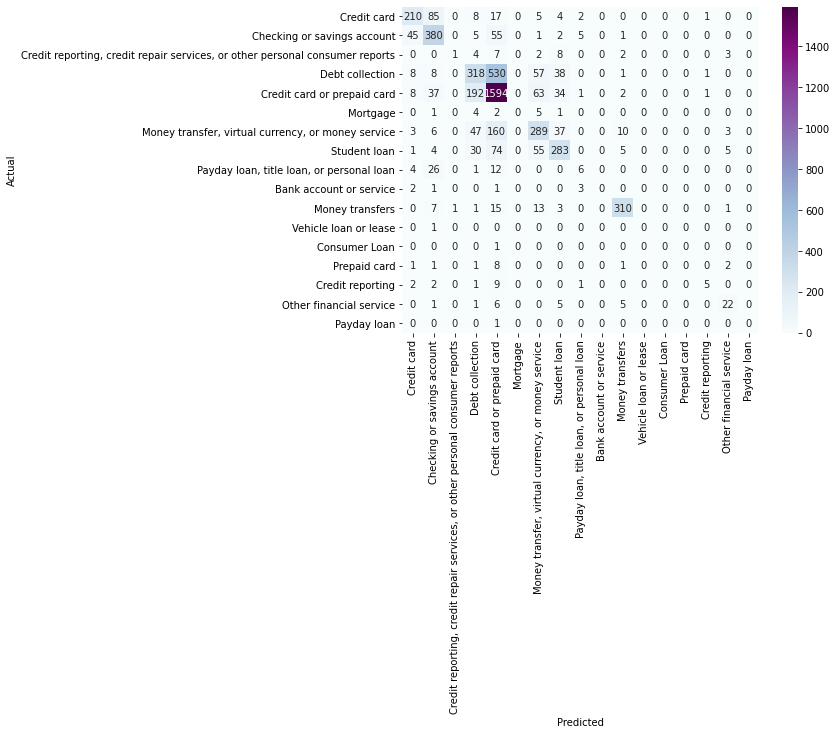

In [73]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, final_lr_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=CITIBANK_['Product'].unique(),yticklabels=CITIBANK_['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [74]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)

In [77]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 1}
0.6442525529630148


In [81]:
final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,train_y)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [82]:
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [83]:
final_svc_predict = final_svc.predict(xvalid_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, valid_y)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.6525214081826831


In [85]:
print(classification_report(valid_y, final_svc_predict,target_names=CITIBANK_['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                                 Credit card       0.86      0.56      0.68       332
                                                 Checking or savings account       0.67      0.81      0.73       494
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00        27
                                                             Debt collection       0.52      0.26      0.34       961
                                                 Credit card or prepaid card       0.62      0.86      0.72      1932
                                                                    Mortgage       0.00      0.00      0.00        13
                          Money transfer, virtual currency, or money service       0.60      0.54      0.57       555
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


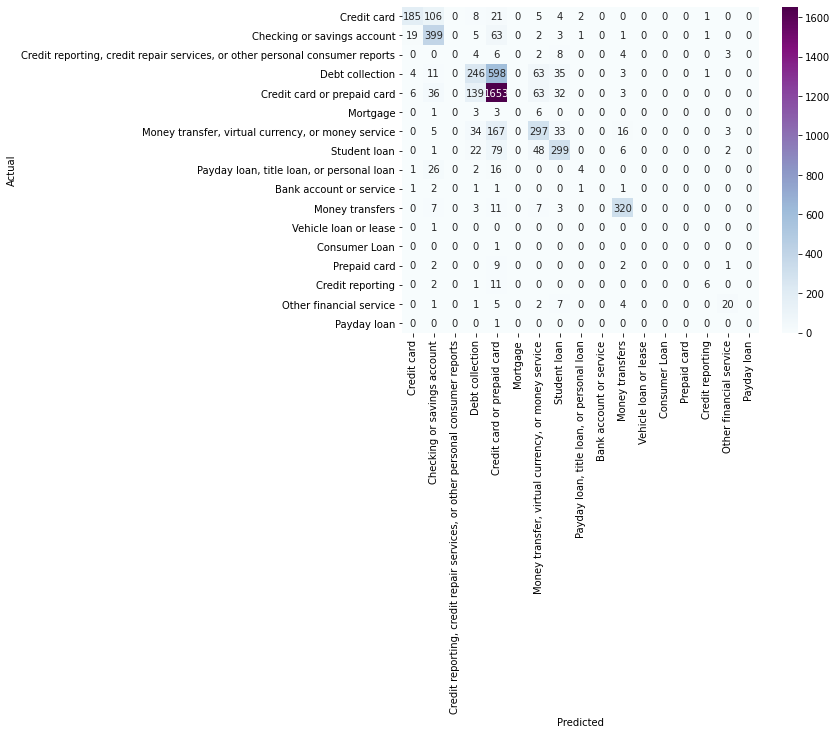

In [86]:
conf_mat = confusion_matrix(valid_y, final_svc_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=CITIBANK_['Product'].unique(),yticklabels=CITIBANK_['Product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()